## Studi Kasus Regresi Linear Sederhana

1.   Load Data

In [ ]:
import pandas as pd

# Buat data frame
df = pd.read_csv('/content/drive/MyDrive/Project_Machine_Learning/Praktikum_3/Data/socr.csv', sep=',')
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [ ]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


2.   Pra proses data



In [ ]:
df1 = (
    df[["Height(Inches)", "Weight(Pounds)"]]
      .rename(columns={"Height(Inches)": "tinggi_cm",
                      "Weight(Pounds)": "berat_kg"})
.assign(
tinggi_cm=lambda d:
d["tinggi_cm"] *
2.54,
#in cm
berat_kg=lambda d: d["berat_kg"] *0.45359237
#Lbkg
)
.round({"tinggi_cm": 2, "berat_kg": 2})
).copy()
df1.head()

,tinggi_cm,berat_kg
0,167.09,51.25
1,181.65,61.91
2,176.27,69.41
3,173.27,64.56
4,172.18,65.45




5. Pembagian data, 80% data training, dan 20% data testing

In [ ]:
from sklearn.model_selection import train_test_split

# Variabel independent/bebas/fitur : tinggi badan
X = df1[["tinggi_cm"]]

# Variabel dependent/terikat/target : berat badan
y = df1["berat_kg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

print('Jumlah data training' , len(X_train))
print('Jumlah data testing' , len(X_test))

Jumlah data training 20000
Jumlah data testing 5000


6. Pemodelan : Training dan testing data

In [ ]:
from sklearn.linear_model import LinearRegression

# Buat objek instan dari class LinearRegression bernama model
model = LinearRegression()

# Jalankan training
model.fit(X_train, y_train)

LinearRegression()

7. Evaluasi model

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("Koefisien (kg per cm):", model.coef_[0])
print("Intersep (kg):", model.intercept_)
print("R2 (test):", r2)
print("MAE (kg):", mean_absolute_error(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
# default squared=True
rmse = np.sqrt(mse)
print("RMSE (kg):", rmse)

Koefisien (kg per cm): 0.5518232618278286
Intersep (kg): -37.657088783833586
R2 (test): 0.24989263013277574
MAE (kg): 3.6704107898943548
RMSE (kg): 4.609006140308042


8. Cetak persamaan regresi

In [ ]:
slope = model.coef_[0]
intercept = model.intercept_

print(f"Persamaan regresi: berat_badan = {slope:.2f} * tinggi_badan + {intercept:.2f}")

Persamaan regresi: berat_badan = 0.55 * tinggi_badan + -37.66


9. Buat plot regresi

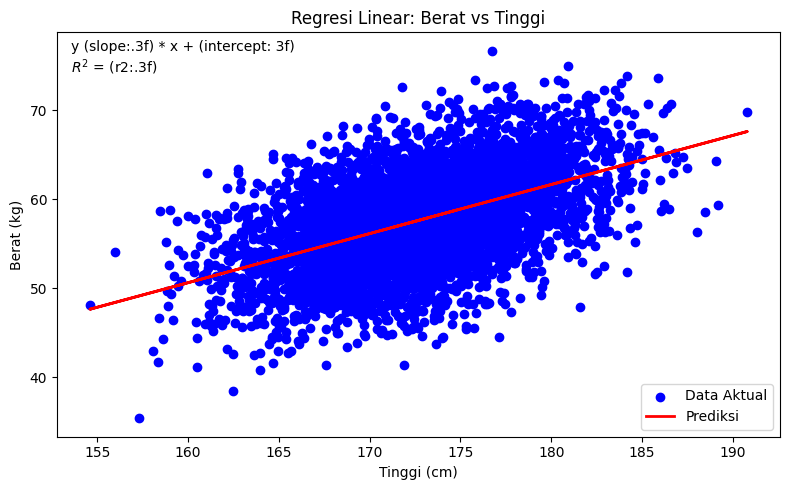

In [ ]:
import matplotlib.pyplot as plt
# Plot data scatter
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color="blue", label="Data Aktual")
#Garis regresi
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Prediksi")
plt.xlabel("Tinggi (cm)")
plt.ylabel("Berat (kg)")
plt.title("Regresi Linear: Berat vs Tinggi")
plt.text(
0.02, 0.98,
f"y (slope:.3f) * x + (intercept: 3f)\n$R^2$ = (r2:.3f)",
transform=plt.gca().transAxes, va="top"
)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

y_pred_test = model.predict(X_test)

# Buat tabel hasil (tinggi, aktual, prediksi, dan error)
hasil = pd.DataFrame({
"Tinggi (cm)": X_test["tinggi_cm"].to_numpy(),
"Berat aktual (kg)": y_test.to_numpy(),
"Berat Prediksi (kg)": y_pred_test,
})

#1) Selisih error (positif = overpredict)
hasil["Selisih error (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat aktual (kg)"]

#2) Akurasi per-baris (100 * (1 - |error| / aktual)), dibatasi 0-100
denom = hasil["Berat aktual (kg)"].replace(0, np.nan) #antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

display(hasil.head())

,Tinggi (cm),Berat aktual (kg),Berat Prediksi (kg),Selisih error (kg),Akurasi (%)
0,174.73,50.16,58.762990,8.602990,82.848904
1,171.31,50.33,56.875754,6.545754,86.994329
2,169.29,58.22,55.761071,-2.458929,95.776488
3,163.30,58.92,52.455650,-6.464350,89.028598
4,170.52,63.06,56.439814,-6.620186,89.501766


Uji dengan data testing baru dari kelas Ml siang

In [36]:
data_baru = pd.read_csv('/content/drive/MyDrive/Project_Machine_Learning/Praktikum_3/Data/berat_kelas_mlsiang - Sheet1.csv', sep=',')

# prediksi berat data baru
y_pred_baru = model.predict(data_baru[['tinggi_cm']])
data_baru['prediksi_kg']=y_pred_baru
data_baru['Selisih error (kg)']=data_baru['prediksi_kg'] - data_baru['berat_aktual']
data_baru

,no,Nama,tinggi_cm,berat_aktual,prediksi_kg,Selisih error (kg)
0,1,muflih,153,43.5,46.771870,3.271870
1,2,anisa,157,46.5,48.979163,2.479163
2,3,autum,170,75.2,56.152866,-19.047134
3,4,hasna,150,48.9,45.116400,-3.783600
4,5,aziz,163,52.6,52.290103,-0.309897
